In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline


In [10]:
mean_01 = np.array([3.0,4.0])
mean_02 = np.array([0.0,-1.0])

cov_01 = np.array([[1.0,0.0],[0.0,1.0]])
cov_02 = np.array([[0.75,0.4],[0.4,0.6]])

dist_01 = np.random.multivariate_normal(mean_01,cov_01,200)
dist_02 = np.random.multivariate_normal(mean_02,cov_02,200)

print dist_01.shape , dist_02.shape


(200, 2) (200, 2)


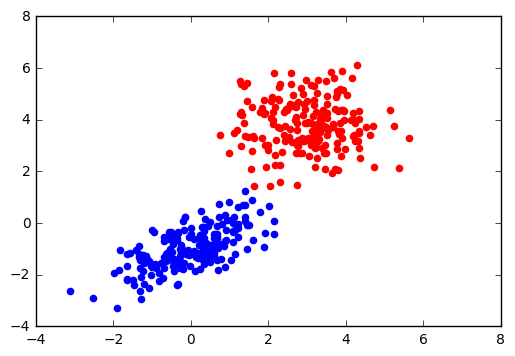

In [11]:
plt.figure(0)

for ix in range(dist_01.shape[0]):
    plt.scatter(dist_01[ix,0], dist_01[ix,1], color = 'red')
    plt.scatter(dist_02[ix,0], dist_02[ix,1], color = 'blue')

plt.show()


0.5


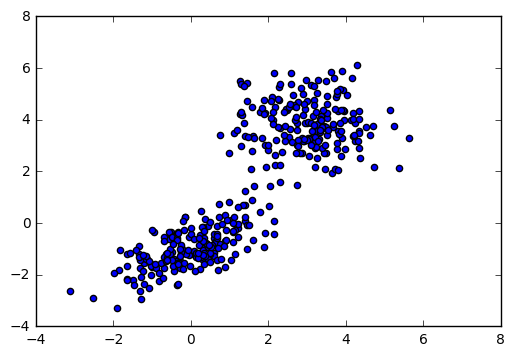

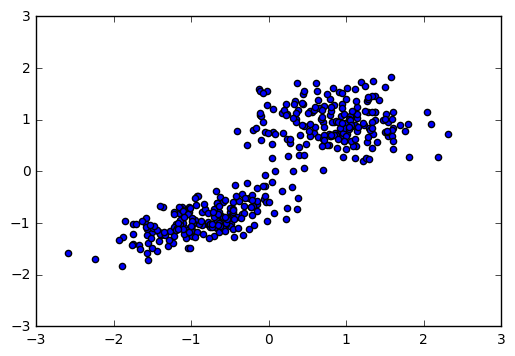

In [41]:
labels = np.zeros((400,))
labels[200:] = 1.0
print labels.mean()

X_data = np.zeros((400,2))
X_data[:200, :] = dist_01
X_data[200:, :] = dist_02

#print X_data[:,0]
plt.figure(0)
plt.scatter(X_data[:, 0], X_data[:, 1])

X_std = (X_data - X_data.mean(axis = 0))/X_data.std(axis = 0)

plt.figure(1)
plt.scatter(X_std[:, 0], X_std[:, 1])


In [87]:
def dist(x1, x2):
    return np.sqrt(((x1 - x2)**2).sum())
    # return abs(x1-x2).sum()
    # return np.sqrt(0.5*((np.sqrt(x1) - np.sqrt(x2))**2).sum())
    # differnt weigths provide different accuracy


def knn(X_train, x, y_train, k=5):
    vals = []
    
    for ix in range(X_train.shape[0]):
        v = [dist(x, X_train[ix, :]), y_train[ix]]
        vals.append(v)
    
    updated_vals = sorted(vals, key=lambda x: x[0])
    pred_arr = np.asarray(updated_vals[:k])
    pred_arr = np.unique(pred_arr[:, 1], return_counts=True)
    pred = pred_arr[1].argmax()
    # return pred_arr[0][pred]
    return pred_arr

q = np.array([-2.0, 0.0])

#print q.shape

res = knn(X_std, q, labels, k=7)

print res

""""if res[1:][0][0] > res[1:][0][1]:
  print "Label is :",0
else:
 print "Label is :",1 """

(array([ 1.]), array([7]))


'"if res[1:][0][0] > res[1:][0][1]:\n  print "Label is :",0\nelse:\n print "Label is :",1 '